**Import Packages**

In [11]:
import pycaret
import pandas as pd
import numpy as np
import sqlalchemy
import mysql.connector

from pycaret import classification
from pycaret.classification import plot_model
from datetime import datetime
import importlib
import model.common

In [52]:
from static_data.load_static_data import *

In [5]:
df_player_positions

,Unnamed: 0,player_id,player_name,player_team_id,player_team_name,player_position
0,0,456167,A.J. Griffin,133,Oakland Athletics,Pitcher
1,0,134460,A.J. Hinch,133,Oakland Athletics,Catcher
2,0,640462,A.J. Puk,133,Oakland Athletics,Pitcher
3,0,605156,Aaron Brooks,133,Oakland Athletics,Pitcher
4,0,488811,Aaron Cunningham,133,Oakland Athletics,Outfielder
...,...,...,...,...,...,...
44728,0,451596,Yovani Gallardo,113,Cincinnati Reds,Pitcher
44729,0,435043,Zach Duke,113,Cincinnati Reds,Pitcher
44730,0,572227,Zach Vincej,113,Cincinnati Reds,Infielder
44731,0,446359,Zack Cozart,113,Cincinnati Reds,Infielder


**Load Data**

In [7]:
collect_data_Base_dir = 'collect_data'

In [8]:
df_game_matchup_total = pd.read_pickle(f'{collect_data_Base_dir}/df_game_matchup_total.pkl')
print(len(df_game_matchup_total))

320540


**Clean Data**

In [71]:
importlib.reload(model.common)

<module 'model.common' from '/home/junlim/projects/mlb-props/model/common.py'>

In [72]:
train_data = df_game_matchup_total[(df_game_matchup_total.game_date > "2012-04-01") & (df_game_matchup_total.game_date < "2022-12-01")][model.common.features]
test_data = df_game_matchup_total[(df_game_matchup_total.game_date > "2022-12-01")][model.common.features]

In [73]:
train_data.groupby('game_year').count()

,pitching_gamesPlayed,pitching_runs,pitching_strikeOuts,pitching_hits,pitching_id,batting_gamesPlayed,batting_runs,batting_strikeOuts,batting_hits,batting_rbi,batting_hit_recorded,batting_id,temp,game_venue,game_date,batting_name,pitching_name
game_year,,,,,,,,,,,,,,,,,
2012,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156
2013,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134
2014,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424
2015,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923
2016,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313
2017,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863
2018,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26696,26711,26711,26711,26711
2019,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733
2020,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567


In [74]:
test_data.groupby('game_year').count()

,pitching_gamesPlayed,pitching_runs,pitching_strikeOuts,pitching_hits,pitching_id,batting_gamesPlayed,batting_runs,batting_strikeOuts,batting_hits,batting_rbi,batting_hit_recorded,batting_id,temp,game_venue,game_date,batting_name,pitching_name
game_year,,,,,,,,,,,,,,,,,
2023,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618


**Model Setup**

In [75]:
classification_setup = pycaret.classification.setup(
    data = train_data, target = "batting_hit_recorded", train_size = .70, use_gpu = False, 
    categorical_features = model.common.categorical_features, ignore_features = model.common.ignore_features)

,Description,Value
0,Session id,7950
1,Target,batting_hit_recorded
2,Target type,Binary
3,Original data shape,"(285367, 18)"
4,Transformed data shape,"(285367, 14)"
5,Transformed train set shape,"(199756, 14)"
6,Transformed test set shape,"(85611, 14)"
7,Ignore features,4
8,Numeric features,10
9,Categorical features,3


**Build/Train Model**

In [76]:
regressin_model = classification_setup.create_model("lr", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6126,0.6201,0.8158,0.6233,0.7067,0.1656,0.1790
1,0.6138,0.6219,0.8146,0.6245,0.7070,0.1687,0.1820
2,0.6084,0.6136,0.8103,0.6208,0.7030,0.1569,0.1694
3,0.6154,0.6270,0.8176,0.6253,0.7086,0.1718,0.1857
4,0.6165,0.6253,0.8136,0.6269,0.7082,0.1755,0.1886
5,0.6135,0.6236,0.8190,0.6234,0.7079,0.1667,0.1808
6,0.6215,0.6275,0.8236,0.6292,0.7134,0.1847,0.1998
7,0.6167,0.6269,0.8150,0.6268,0.7086,0.1756,0.1889
8,0.6186,0.6267,0.8184,0.6278,0.7105,0.1793,0.1933


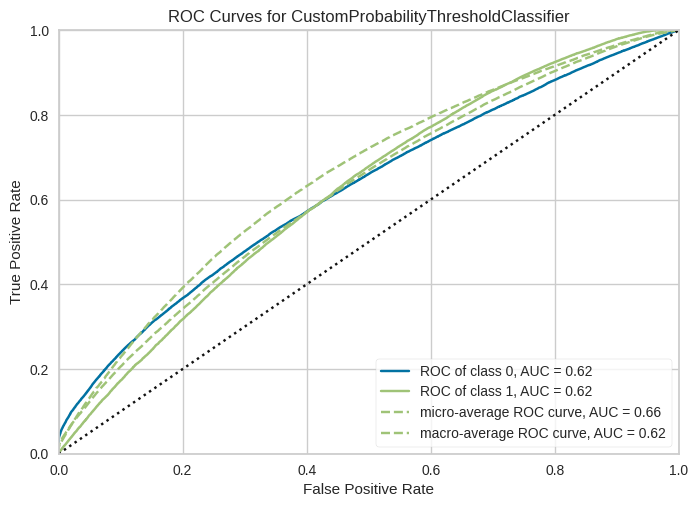

In [77]:
plot_model(regressin_model, plot = 'auc')

see the higher threshold catches smaller portion (recall ~ 5%) but with much higher precision 72%.

In [78]:
classification_setup.create_model("lr", probability_threshold = 0.75)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4501,0.6201,0.0617,0.7268,0.1138,0.0266,0.0707
1,0.4502,0.6219,0.0604,0.7364,0.1116,0.0273,0.0737
2,0.4518,0.6136,0.0676,0.7222,0.1236,0.0285,0.0722
3,0.4516,0.6270,0.0643,0.7357,0.1183,0.0290,0.0760
4,0.4490,0.6253,0.0591,0.7250,0.1093,0.0252,0.0684
5,0.4505,0.6236,0.0614,0.7356,0.1133,0.0276,0.0740
6,0.4498,0.6275,0.0610,0.7260,0.1126,0.0262,0.0700
7,0.4501,0.6269,0.0621,0.7249,0.1143,0.0265,0.0702
8,0.4496,0.6267,0.0607,0.7249,0.1120,0.0259,0.0693


CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=7950,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.75,
                                     random_state=7950, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

In [79]:
train_prediction = pycaret.classification.predict_model(data = train_data, estimator = regression_model)
train_prediction = pd.merge(train_prediction, df_player_team_positions[['player_id','player_team_name']], left_on='batting_id', right_on='player_id', how='left')
train_prediction["theo_odds"] = train_prediction["prediction_score"].apply(model.common.odds_calculator)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6256,0.6351,0.8420,0.6291,0.7201,0.1894,0.2086


In [80]:
score_threshold = 0.75
confident_train_prediction = train_prediction[(train_prediction["prediction_score"] >= score_threshold) & (train_prediction["prediction_label"] == 1)].sort_values(by = "prediction_score", ascending = False).drop_duplicates("batting_name")
confident_train_prediction[['game_date', "batting_name", "batting_hit_recorded",	"prediction_score", "player_team_name", "theo_odds"]]

,game_date,batting_name,batting_hit_recorded,prediction_score,player_team_name,theo_odds
544863,2017-06-10,Trea Turner,0,0.8142,Philadelphia Phillies,-438
794006,2020-07-30,Whit Merrifield,0,0.8112,Kansas City Royals,-430
8301,2012-04-16,Derek Jeter,1,0.8081,New York Yankees,-421
337436,2015-05-17,Jose Altuve,0,0.8057,Houston Astros,-415
76536,2012-08-06,Marco Scutaro,0,0.8041,San Francisco Giants,-410
...,...,...,...,...,...,...
627503,2018-05-10,Cesar Hernandez,1,0.7517,Chicago White Sox,-303
43001,2012-06-09,Miguel Cabrera,0,0.7513,Miami Marlins,-302
243994,2014-05-21,Jhonny Peralta,0,0.7511,Detroit Tigers,-302
910101,2022-04-13,Ty France,1,0.7510,San Diego Padres,-302


In [81]:
confident_train_prediction.batting_hit_recorded.sum() / len(confident_train_prediction)

0.7386363636363636

**Finalize & Save Model**

In [82]:
# train over the whole dataset without validation split
regressin_model_finalized = pycaret.classification.finalize_model(regressin_model)

In [83]:
pycaret.classification.save_model(regressin_model_finalized, model.common.model_file_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pitching_gamesPlayed',
                                              'pitching_runs',
                                              'pitching_strikeOuts',
                                              'pitching_hits',
                                              'batting_gamesPlayed',
                                              'batting_runs',
                                              'batting_strikeOuts',
                                              'batting_hits', 'batting_rbi',
                                              'temp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill...
                                  